In [1]:
import snowflake.connector
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import getpass
import seaborn as sns 
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sqlalchemy import create_engine
from sqlalchemy.engine import URL
from snowflake.connector.pandas_tools import write_pandas

In [2]:
# Establish the connection
conn = snowflake.connector.connect(
    account= 'zrtagll-iw85964',
    user='AKAS483',
    password = getpass.getpass('Your Snowflake Password: '),
    warehouse='DEMO_WAREHOUSE',
    database='DEMO_DATABASE',
    schema='DEMO_SCHEMA',
    role='ACCOUNTADMIN'
)

# Test the connection
cursor = conn.cursor()
cursor.execute("SELECT CURRENT_VERSION()")
print(cursor.fetchone())

Your Snowflake Password: ········
('8.47.1',)


In [3]:
cur = conn.cursor()

In [4]:
cur.execute("SELECT * FROM CUSTOMER")

In [5]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
df_customer = cur.fetch_pandas_all()

In [7]:
df_customer.head(10)

,CUSTOMERID,CUSTOMERNAME,CONTACTNAME,COUNTRY
0,1,Wendy Berg,Duane Hayes,New Caledonia
1,2,Timothy Garcia,Taylor Roberson,Bosnia and Herzegovina
2,3,Caitlin Turner,Rodney Robbins,Lesotho
3,4,Jessica Hensley,Tyler Peters,Germany
4,5,Kyle Waller,Charles Lynch,Denmark
5,6,Evan Estes,Shannon Gonzalez,Brunei Darussalam
6,7,Julie Rosales,Tina Collins,Hungary
7,8,Kathy Williams,Kathleen Burch,Netherlands Antilles
8,9,Robert Smith,Elizabeth Hester MD,Australia
9,10,Alyssa Lowe,Robert Gomez,Malawi


In [8]:
cur.execute("SELECT * FROM ORDERS")

In [9]:
df_orders = cur.fetch_pandas_all()

In [10]:
df_orders.head(10)

,ORDERID,CUSTOMERID,ORDERDATE
0,1,149,01-07-2023
1,2,329,16-07-2022
2,3,452,28-07-2020
3,4,380,10-01-2021
4,5,707,13-05-2023
5,6,46,02-02-2023
6,7,537,15-07-2022
7,8,738,11-04-2023
8,9,739,07-10-2021
9,10,818,24-07-2021


In [11]:
cur.execute("SELECT * FROM ORDERSDETAILS")

In [12]:
df_ordersdetails = cur.fetch_pandas_all()

In [13]:
df_ordersdetails.head(10)

,ORDERDETAILID,ORDERID,PRODUCTID,QUANTITY
0,1,614,919,10
1,2,299,97,7
2,3,809,614,6
3,4,104,435,7
4,5,588,535,4
5,6,209,146,6
6,7,721,359,5
7,8,734,774,8
8,9,963,279,9
9,10,522,189,10


In [14]:
cur.execute("SELECT * FROM PRODUCTS")

In [15]:
df_products = cur.fetch_pandas_all()

In [16]:
df_products.head(10)

,PRODUCTID,PRODUCTNAME,PRICE
0,1,environmental,68.33
1,2,walk,92.88
2,3,attorney,30.09
3,4,identify,58.78
4,5,morning,50.99
5,6,fire,99.11
6,7,language,17.46
7,8,Mr,36.49
8,9,around,44.79
9,10,turn,30.68


In [17]:
#check for the duplicates and missing values
print(df_orders.info())
print(df_ordersdetails.info())
print(df_customer.info())
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ORDERID     1000 non-null   int16 
 1   CUSTOMERID  1000 non-null   int16 
 2   ORDERDATE   1000 non-null   object
dtypes: int16(2), object(1)
memory usage: 11.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ORDERDETAILID  1000 non-null   int16
 1   ORDERID        1000 non-null   int16
 2   PRODUCTID      1000 non-null   int16
 3   QUANTITY       1000 non-null   int8 
dtypes: int16(3), int8(1)
memory usage: 7.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CUSTOMERID    1002 non-null   int16

In [18]:
#check duplicates
print(df_orders[df_orders.duplicated()])
print(df_ordersdetails[df_ordersdetails.duplicated()])
print(df_customer[df_customer.duplicated()])
print(df_products[df_products.duplicated()])

Empty DataFrame
Columns: [ORDERID, CUSTOMERID, ORDERDATE]
Index: []
Empty DataFrame
Columns: [ORDERDETAILID, ORDERID, PRODUCTID, QUANTITY]
Index: []
Empty DataFrame
Columns: [CUSTOMERID, CUSTOMERNAME, CONTACTNAME, COUNTRY]
Index: []
Empty DataFrame
Columns: [PRODUCTID, PRODUCTNAME, PRICE]
Index: []


# 2. Join Operations
•	Perform the following joins using Pandas:
    
    Join 1: Combine Orders and Customers using customer_id to get customer details for each order.
    
    Join 2: Combine the result of Join 1 with OrderDetails using order_id to get detailed order information.
    
    Join 3: Combine the result of Join 2 with Products using product_id to get product details for each line item.

In [51]:
#joining orders and customers table on customerid
df_ordcust = pd.merge(df_orders, df_customer, on='CUSTOMERID', how='inner')

In [52]:
df_ordcust.head()

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY
0,1,149,01-07-2023,Toni Roberts,Briana Pena,Chile
1,2,329,16-07-2022,Susan Evans,Nicole Hicks,Monaco
2,3,452,28-07-2020,Sharon Johnson,Amy Mack,Cambodia
3,4,380,10-01-2021,Annette Hernandez,Gary Williams,New Caledonia
4,5,707,13-05-2023,James Jones,Mr. Terry Bailey DDS,Sierra Leone


In [53]:
#merging df_ordcust with orderdetails table
df_combine = pd.merge(df_ordcust, df_ordersdetails, on='ORDERID', how='left')

In [54]:
df_combine.head(10)

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY
0,1,149,01-07-2023,Toni Roberts,Briana Pena,Chile,716.0,425.0,6.0
1,2,329,16-07-2022,Susan Evans,Nicole Hicks,Monaco,NaN,NaN,NaN
2,3,452,28-07-2020,Sharon Johnson,Amy Mack,Cambodia,55.0,662.0,7.0
3,3,452,28-07-2020,Sharon Johnson,Amy Mack,Cambodia,318.0,920.0,4.0
4,4,380,10-01-2021,Annette Hernandez,Gary Williams,New Caledonia,NaN,NaN,NaN
5,5,707,13-05-2023,James Jones,Mr. Terry Bailey DDS,Sierra Leone,370.0,896.0,7.0
6,6,46,02-02-2023,Nathan Butler,Natalie Harrington,French Guiana,NaN,NaN,NaN
7,7,537,15-07-2022,Theresa Patterson,Charles Nguyen,Malawi,NaN,NaN,NaN
8,8,738,11-04-2023,Shannon Waller,Justin Gardner,Wallis and Futuna,11.0,862.0,4.0
9,8,738,11-04-2023,Shannon Waller,Justin Gardner,Wallis and Futuna,50.0,798.0,10.0


In [55]:
df_all = pd.merge(df_combine, df_products, on='PRODUCTID', how='left')

In [56]:
df_all.head()

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY,PRODUCTNAME,PRICE
0,1,149,01-07-2023,Toni Roberts,Briana Pena,Chile,716.0,425.0,6.0,officer,28.08
1,2,329,16-07-2022,Susan Evans,Nicole Hicks,Monaco,NaN,NaN,NaN,NaN,NaN
2,3,452,28-07-2020,Sharon Johnson,Amy Mack,Cambodia,55.0,662.0,7.0,ahead,69.29
3,3,452,28-07-2020,Sharon Johnson,Amy Mack,Cambodia,318.0,920.0,4.0,local,55.16
4,4,380,10-01-2021,Annette Hernandez,Gary Williams,New Caledonia,NaN,NaN,NaN,NaN,NaN


# 3. Handling Missing Values (if any)

Identify missing values in the final dataset.
Replace missing values:
    
    For numeric columns, use the column mean.
    For categorical columns, use the mode.


In [57]:
#find the missing values
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ORDERID        1378 non-null   int16  
 1   CUSTOMERID     1378 non-null   int16  
 2   ORDERDATE      1378 non-null   object 
 3   CUSTOMERNAME   1378 non-null   object 
 4   CONTACTNAME    1378 non-null   object 
 5   COUNTRY        1378 non-null   object 
 6   ORDERDETAILID  1000 non-null   float64
 7   PRODUCTID      1000 non-null   float64
 8   QUANTITY       1000 non-null   float64
 9   PRODUCTNAME    1000 non-null   object 
 10  PRICE          1000 non-null   float64
dtypes: float64(4), int16(2), object(5)
memory usage: 102.4+ KB


In [58]:
#last columns ORDERDETAILID, PRODUCTID, QUANTITY, PRODUCTNAME & PRICE has the null values
df_all.describe()

,ORDERID,CUSTOMERID,ORDERDETAILID,PRODUCTID,QUANTITY,PRICE
count,1378.000000,1378.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.357039,501.348331,500.500000,510.145000,5.521000,52.15039
std,288.546296,282.415752,288.819436,280.767887,2.776196,27.09607
min,1.000000,1.000000,1.000000,2.000000,1.000000,5.35000
25%,245.000000,260.500000,250.750000,275.500000,3.000000,28.06000
50%,507.500000,495.000000,500.500000,519.000000,5.000000,52.05000
75%,747.750000,749.000000,750.250000,741.500000,8.000000,76.02000
max,1000.000000,998.000000,1000.000000,1000.000000,10.000000,99.86000


In [59]:
df_all[['QUANTITY', 'PRICE']]=df_all[['QUANTITY', 'PRICE']].fillna(df_all[['QUANTITY', 'PRICE']].mean())

In [60]:
df_all.head(10)

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY,PRODUCTNAME,PRICE
0,1,149,01-07-2023,Toni Roberts,Briana Pena,Chile,716.0,425.0,6.000,officer,28.08000
1,2,329,16-07-2022,Susan Evans,Nicole Hicks,Monaco,NaN,NaN,5.521,NaN,52.15039
2,3,452,28-07-2020,Sharon Johnson,Amy Mack,Cambodia,55.0,662.0,7.000,ahead,69.29000
3,3,452,28-07-2020,Sharon Johnson,Amy Mack,Cambodia,318.0,920.0,4.000,local,55.16000
4,4,380,10-01-2021,Annette Hernandez,Gary Williams,New Caledonia,NaN,NaN,5.521,NaN,52.15039
5,5,707,13-05-2023,James Jones,Mr. Terry Bailey DDS,Sierra Leone,370.0,896.0,7.000,possible,16.03000
6,6,46,02-02-2023,Nathan Butler,Natalie Harrington,French Guiana,NaN,NaN,5.521,NaN,52.15039
7,7,537,15-07-2022,Theresa Patterson,Charles Nguyen,Malawi,NaN,NaN,5.521,NaN,52.15039
8,8,738,11-04-2023,Shannon Waller,Justin Gardner,Wallis and Futuna,11.0,862.0,4.000,throughout,29.86000
9,8,738,11-04-2023,Shannon Waller,Justin Gardner,Wallis and Futuna,50.0,798.0,10.000,measure,27.46000


In [61]:
df_all['QUANTITY']=df_all['QUANTITY'].astype(int)

In [62]:
for col in df_all[['ORDERDETAILID', 'PRODUCTNAME', 'PRODUCTID']]:
    df_all[col]=df_all[col].fillna(df_all[col].mode()[0])

In [63]:
df_all.head(10)

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY,PRODUCTNAME,PRICE
0,1,149,01-07-2023,Toni Roberts,Briana Pena,Chile,716.0,425.0,6,officer,28.08000
1,2,329,16-07-2022,Susan Evans,Nicole Hicks,Monaco,1.0,91.0,5,occur,52.15039
2,3,452,28-07-2020,Sharon Johnson,Amy Mack,Cambodia,55.0,662.0,7,ahead,69.29000
3,3,452,28-07-2020,Sharon Johnson,Amy Mack,Cambodia,318.0,920.0,4,local,55.16000
4,4,380,10-01-2021,Annette Hernandez,Gary Williams,New Caledonia,1.0,91.0,5,occur,52.15039
5,5,707,13-05-2023,James Jones,Mr. Terry Bailey DDS,Sierra Leone,370.0,896.0,7,possible,16.03000
6,6,46,02-02-2023,Nathan Butler,Natalie Harrington,French Guiana,1.0,91.0,5,occur,52.15039
7,7,537,15-07-2022,Theresa Patterson,Charles Nguyen,Malawi,1.0,91.0,5,occur,52.15039
8,8,738,11-04-2023,Shannon Waller,Justin Gardner,Wallis and Futuna,11.0,862.0,4,throughout,29.86000
9,8,738,11-04-2023,Shannon Waller,Justin Gardner,Wallis and Futuna,50.0,798.0,10,measure,27.46000


In [68]:
df_all[['ORDERDETAILID', 'PRODUCTID']]=df_all[['ORDERDETAILID', 'PRODUCTID']].astype(int)

In [69]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ORDERID        1378 non-null   int16         
 1   CUSTOMERID     1378 non-null   int16         
 2   ORDERDATE      1378 non-null   datetime64[ns]
 3   CUSTOMERNAME   1378 non-null   object        
 4   CONTACTNAME    1378 non-null   object        
 5   COUNTRY        1378 non-null   object        
 6   ORDERDETAILID  1378 non-null   int64         
 7   PRODUCTID      1378 non-null   int64         
 8   QUANTITY       1378 non-null   int64         
 9   PRODUCTNAME    1378 non-null   object        
 10  PRICE          1378 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int16(2), int64(3), object(4)
memory usage: 102.4+ KB


# 4. Date and Time Analysis

    Convert order_date to Pandas datetime format if not already.
    
    Perform the following tasks:
        
        Extract and create new columns for:
            Year
            Month
            Day of the Week (e.g., Monday, Tuesday)
        
        Calculate the days since the order for each row using timedelta:
            
            Create a column called days_since_order that calculates the difference between the current date and the order_date.
            Filter the dataset to find orders placed within the last 30 days.
            Group the data by Year and Month, and calculate the total and average total_amount for each group.


In [70]:
#convert string to datetime
df_all['ORDERDATE'] = pd.to_datetime(df_all['ORDERDATE'], format = '%d-%m-%Y')

In [71]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ORDERID        1378 non-null   int16         
 1   CUSTOMERID     1378 non-null   int16         
 2   ORDERDATE      1378 non-null   datetime64[ns]
 3   CUSTOMERNAME   1378 non-null   object        
 4   CONTACTNAME    1378 non-null   object        
 5   COUNTRY        1378 non-null   object        
 6   ORDERDETAILID  1378 non-null   int64         
 7   PRODUCTID      1378 non-null   int64         
 8   QUANTITY       1378 non-null   int64         
 9   PRODUCTNAME    1378 non-null   object        
 10  PRICE          1378 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int16(2), int64(3), object(4)
memory usage: 102.4+ KB


In [72]:
df_all['YEAR'] = df_all['ORDERDATE'].dt.year
df_all['MONTH'] = df_all['ORDERDATE'].dt.month
df_all['DAY OF THE WEEK'] = df_all['ORDERDATE'].dt.day_name()

In [73]:
df_all.head()

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY,PRODUCTNAME,PRICE,YEAR,MONTH,DAY OF THE WEEK
0,1,149,2023-07-01,Toni Roberts,Briana Pena,Chile,716,425,6,officer,28.08000,2023,7,Saturday
1,2,329,2022-07-16,Susan Evans,Nicole Hicks,Monaco,1,91,5,occur,52.15039,2022,7,Saturday
2,3,452,2020-07-28,Sharon Johnson,Amy Mack,Cambodia,55,662,7,ahead,69.29000,2020,7,Tuesday
3,3,452,2020-07-28,Sharon Johnson,Amy Mack,Cambodia,318,920,4,local,55.16000,2020,7,Tuesday
4,4,380,2021-01-10,Annette Hernandez,Gary Williams,New Caledonia,1,91,5,occur,52.15039,2021,1,Sunday


In [74]:
df_all['days_since_order'] = (pd.Timestamp.now() - df_all['ORDERDATE']).dt.days

In [75]:
df_all.head()

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY,PRODUCTNAME,PRICE,YEAR,MONTH,DAY OF THE WEEK,days_since_order
0,1,149,2023-07-01,Toni Roberts,Briana Pena,Chile,716,425,6,officer,28.08000,2023,7,Saturday,546
1,2,329,2022-07-16,Susan Evans,Nicole Hicks,Monaco,1,91,5,occur,52.15039,2022,7,Saturday,896
2,3,452,2020-07-28,Sharon Johnson,Amy Mack,Cambodia,55,662,7,ahead,69.29000,2020,7,Tuesday,1614
3,3,452,2020-07-28,Sharon Johnson,Amy Mack,Cambodia,318,920,4,local,55.16000,2020,7,Tuesday,1614
4,4,380,2021-01-10,Annette Hernandez,Gary Williams,New Caledonia,1,91,5,occur,52.15039,2021,1,Sunday,1448


In [79]:
#Filter the dataset to find orders placed within the last 30 days.
df_30days = df_all[df_all['days_since_order']<=30]
df_30days

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY,PRODUCTNAME,PRICE,YEAR,MONTH,DAY OF THE WEEK,days_since_order


In [83]:
#Group the data by Year and Month, and calculate the total and average total_amount for each group.
df_group = df_all.groupby(['YEAR', 'MONTH']).agg(TOTAL = ('PRICE','sum'), AVG_TOT_SUM = ('PRICE', 'mean') ).reset_index()

In [84]:
df_group

,YEAR,MONTH,TOTAL,AVG_TOT_SUM
0,2020,1,1209.08273,48.363309
1,2020,2,1240.85273,51.702197
2,2020,3,1857.75273,59.927507
3,2020,4,1367.41195,54.696478
4,2020,5,610.09078,50.840898
5,2020,6,519.28234,51.928234
6,2020,7,1401.76468,53.914026
7,2020,8,1310.08351,54.586813
8,2020,9,1610.34234,50.323198
9,2020,10,1480.55234,56.944321


# 5. Aggregations and Insights
    
    Calculate:
        Total revenue (total_amount) and average revenue by category.
        Total orders and revenue by region.
        Top 5 customers with the highest total revenue.
    Identify products with sales declining over time:
        Group by product_name and calculate monthly revenue.
        Use a simple trend analysis to find products with decreasing monthly sales.


In [85]:
df_all.head()

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY,PRODUCTNAME,PRICE,YEAR,MONTH,DAY OF THE WEEK,days_since_order
0,1,149,2023-07-01,Toni Roberts,Briana Pena,Chile,716,425,6,officer,28.08000,2023,7,Saturday,546
1,2,329,2022-07-16,Susan Evans,Nicole Hicks,Monaco,1,91,5,occur,52.15039,2022,7,Saturday,896
2,3,452,2020-07-28,Sharon Johnson,Amy Mack,Cambodia,55,662,7,ahead,69.29000,2020,7,Tuesday,1614
3,3,452,2020-07-28,Sharon Johnson,Amy Mack,Cambodia,318,920,4,local,55.16000,2020,7,Tuesday,1614
4,4,380,2021-01-10,Annette Hernandez,Gary Williams,New Caledonia,1,91,5,occur,52.15039,2021,1,Sunday,1448


In [86]:
#Total revenue (total_amount) and average revenue by product category.
df_prod_category = df_all.groupby(['PRODUCTNAME']).agg(total_amount = ('PRICE', 'sum'), average_revenue = ('PRICE', 'mean')).reset_index()

In [87]:
df_prod_category

,PRODUCTNAME,total_amount,average_revenue
0,Mr,36.49,36.490000
1,Mrs,133.41,44.470000
2,TV,43.97,43.970000
3,a,444.35,88.870000
4,about,183.88,61.293333
...,...,...,...
464,write,150.66,30.132000
465,wrong,77.63,25.876667
466,yes,216.27,72.090000
467,young,5.96,5.960000


In [88]:
#Total orders and revenue by region.
df_region = df_all.groupby(['COUNTRY']).agg(total_order = ('QUANTITY', 'sum'), total_revenue = ('PRICE', 'sum')).reset_index()

In [89]:
df_region

,COUNTRY,total_order,total_revenue
0,Afghanistan,50,449.57039
1,Albania,53,566.65195
2,Algeria,37,230.29039
3,American Samoa,42,450.78039
4,Andorra,17,182.15117
...,...,...,...
218,Wallis and Futuna,98,744.41351
219,Western Sahara,5,52.15039
220,Yemen,20,164.06000
221,Zambia,8,95.35039


In [94]:
#Top 5 customers with the highest total revenue
df_top5 = df_all.groupby(['CUSTOMERNAME']).agg(total_revenue = ('PRICE', 'sum')).reset_index()
df_top5.sort_values(by='total_revenue', ascending = False).head()

,CUSTOMERNAME,total_revenue
66,Brian Chavez,549.69039
393,Mary Duncan,535.64000
361,Lauren Long,508.94000
7,Alexa Lane,463.58039
395,Mary Sanders,436.39039


In [101]:
#Group by product_name and calculate monthly revenue.
df_monthly_rev = df_all.groupby(['PRODUCTNAME','MONTH']).agg(monthly_rev = ('PRICE', 'sum')).reset_index()
df_monthly_rev.head(20)

,PRODUCTNAME,MONTH,monthly_rev
0,Mr,6,36.49
1,Mrs,11,44.47
2,Mrs,12,88.94
3,TV,5,43.97
4,a,4,88.87
5,a,8,88.87
6,a,9,88.87
7,a,11,88.87
8,a,12,88.87
9,about,8,98.75


In [117]:
df_monthly_rev['revenue_diff'] = df_monthly_rev.groupby('PRODUCTNAME')['monthly_rev'].diff()

In [121]:
df_monthly_rev.head()

,PRODUCTNAME,MONTH,monthly_rev,revenue_diff
0,Mr,6,36.49,NaN
1,Mrs,11,44.47,NaN
2,Mrs,12,88.94,44.47
3,TV,5,43.97,NaN
4,a,4,88.87,NaN


In [118]:
decreasing_sales = df_monthly_rev.groupby('PRODUCTNAME').apply(
    lambda group: all(group['revenue_diff'].dropna() < 0)
).reset_index(name='is_decreasing')

C:\Users\DX\AppData\Local\Temp\ipykernel_6456\2836335032.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decreasing_sales = df_monthly_rev.groupby('PRODUCTNAME').apply(


In [119]:
decreasing_sales

,PRODUCTNAME,is_decreasing
0,Mr,True
1,Mrs,False
2,TV,True
3,a,False
4,about,True
...,...,...
464,write,False
465,wrong,False
466,yes,False
467,young,True


<Axes: xlabel='MONTH', ylabel='monthly_rev'>

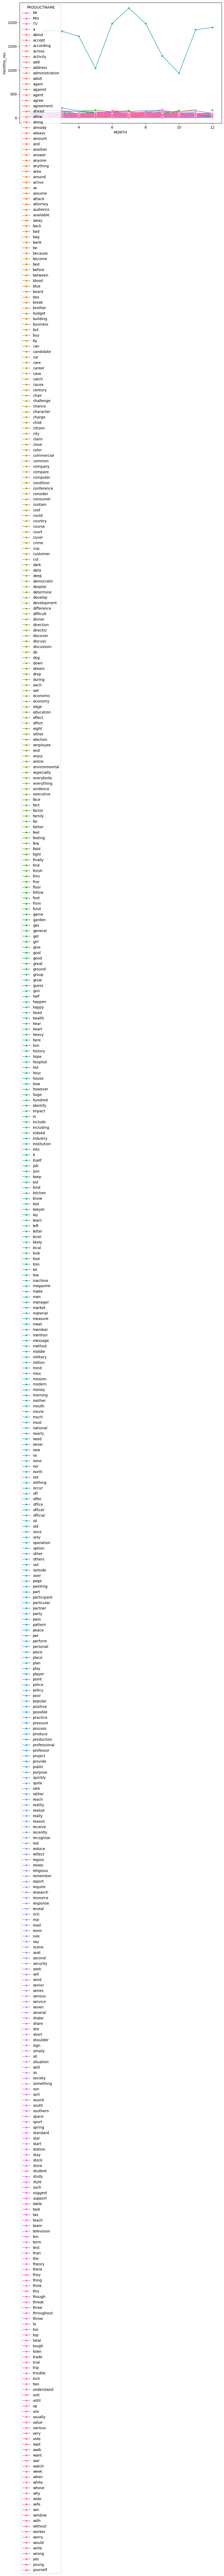

In [104]:
#Use a simple trend analysis to find products with decreasing monthly sales.
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_monthly_rev,
    x='MONTH',
    y='monthly_rev',
    hue='PRODUCTNAME',
    marker='o'
)

# 6. Advanced Analysis with Timedelta

    Create a column delivery_date by adding a simulated delivery period (e.g., 5 days) to the order_date using timedelta
    Identify late deliveries (e.g., orders delivered after a specific threshold).
    Find the average time between orders for each customer.


In [107]:
#Create a column delivery_date by adding a simulated delivery period (e.g., 5 days) to the order_date using timedelta
df_all['delivery_date'] = df_all['ORDERDATE']+pd.to_timedelta(5, unit='D')

In [108]:
df_all.head()

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY,PRODUCTNAME,PRICE,YEAR,MONTH,DAY OF THE WEEK,days_since_order,delivery_date
0,1,149,2023-07-01,Toni Roberts,Briana Pena,Chile,716,425,6,officer,28.08000,2023,7,Saturday,546,2023-07-06
1,2,329,2022-07-16,Susan Evans,Nicole Hicks,Monaco,1,91,5,occur,52.15039,2022,7,Saturday,896,2022-07-21
2,3,452,2020-07-28,Sharon Johnson,Amy Mack,Cambodia,55,662,7,ahead,69.29000,2020,7,Tuesday,1614,2020-08-02
3,3,452,2020-07-28,Sharon Johnson,Amy Mack,Cambodia,318,920,4,local,55.16000,2020,7,Tuesday,1614,2020-08-02
4,4,380,2021-01-10,Annette Hernandez,Gary Williams,New Caledonia,1,91,5,occur,52.15039,2021,1,Sunday,1448,2021-01-15


In [110]:
#Find the average time between orders for each customer.
df_avg_ordertime = df_all.sort_values(by='ORDERDATE')
df_avg_ordertime['time_diff'] = df_avg_ordertime.groupby('CUSTOMERNAME')['ORDERDATE'].diff()

In [111]:
df_avg_ordertime.head()

,ORDERID,CUSTOMERID,ORDERDATE,CUSTOMERNAME,CONTACTNAME,COUNTRY,ORDERDETAILID,PRODUCTID,QUANTITY,PRODUCTNAME,PRICE,YEAR,MONTH,DAY OF THE WEEK,days_since_order,delivery_date,time_diff
419,299,634,2020-01-01,Diane Hanson,Michelle Allen,Benin,26,864,7,reach,44.98000,2020,1,Wednesday,1823,2020-01-06,NaT
418,299,634,2020-01-01,Diane Hanson,Michelle Allen,Benin,2,97,7,team,24.75000,2020,1,Wednesday,1823,2020-01-06,0 days
1109,799,446,2020-01-04,Amanda Long,Andrew Mcpherson,Isle of Man,1,91,5,occur,52.15039,2020,1,Saturday,1820,2020-01-09,NaT
1064,766,275,2020-01-05,Francis Nelson,Courtney Green,Tokelau,197,765,9,close,8.20000,2020,1,Sunday,1819,2020-01-10,NaT
1065,766,275,2020-01-05,Francis Nelson,Courtney Green,Tokelau,528,773,4,nearly,68.62000,2020,1,Sunday,1819,2020-01-10,0 days


In [116]:
avg_time = df_avg_ordertime.groupby('CUSTOMERNAME')['time_diff'].mean().reset_index()
avg_time.sort_values(by='CUSTOMERNAME')

,CUSTOMERNAME,time_diff
0,Abigail Robles,NaT
1,Adam Grant,430 days 12:00:00
2,Adam King,395 days 00:00:00
3,Adam Potter,191 days 08:00:00
4,Adam Tran,NaT
...,...,...
618,William Nolan,110 days 00:00:00
619,William Schneider,356 days 00:00:00
620,William Watson,335 days 00:00:00
621,Yvette Weaver,NaT
